## Dependencies
First, we load the required dependencies. 

In [1]:
## load dependencies
from imbalance_metrics import regression_metrics as rm
import pandas as pd 
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Data
Firstly, we load our data. In this example, we use the Ames Housing Dataset training split retreived from Kaggle, originally complied by Dean De Cock. 
Link to original dataset - https://www.kaggle.com/datasets/prevek18/ames-housing-dataset


In [2]:
## load data
df = pd.read_csv(
    'https://raw.githubusercontent.com/paobranco/ImbalanceMetrics/main/data/housing.csv', index_col=None, na_values=['NA']
)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Remove unecessary columns. In this case, we are only interested in Lot Size and Sales Price; we remove all other columns.
# Drop Order to Lot Frontage
df.drop(df.iloc[:, 0:4], inplace=True, axis=1)
# Drop Street to Sale Condition
df.drop(df.iloc[:, 1:76], inplace=True, axis=1)

# Dataframe for project
df.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [4]:
df.describe()

,LotArea,SalePrice
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


In [5]:
# Assign x and y values from the dataframe as train and test. In this example, we have only used LotArea as training parameter.
X = df['LotArea'].values
y = df['SalePrice'].values

In [6]:
# As X only has one feature, we have to reshape it.
X = X.reshape(-1,1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [8]:
sc = StandardScaler()
y_train = sc.fit_transform(y_train.reshape(-1, 1))
y_test = sc.transform (y_test.reshape(-1, 1))

## Model
After, we train our model with data. In this example, we use the `LinearRegression()` from sklearn. This model will predict 'SalePrice' as y_pred which we will compare with true value y in our evaluation.


In [9]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [10]:
y_test=y_test.reshape(-1)
y_pred=y_pred.reshape(-1)

## Evaluation

In [11]:
sera= rm.sera(y_test.reshape(-1),y_pred,return_err = True)

[]

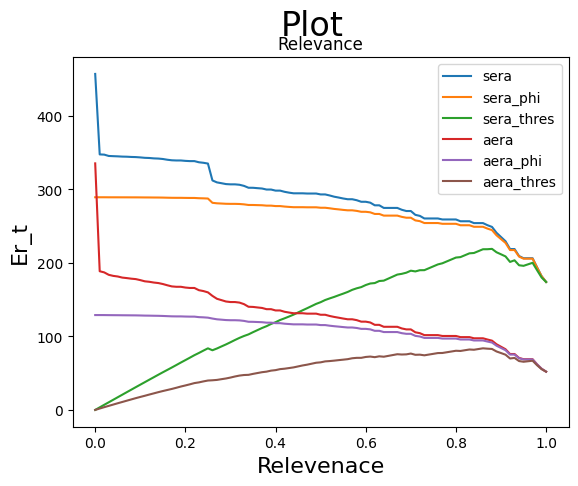

In [17]:
fig, ax2 = plt.subplots()


fig.figure.suptitle("Plot", fontsize = 24)

# create a line plot
ax2.plot(sera["thrs"],sera["errors"], label='sera')

# add axis labels and title
ax2.set_xlabel('Relevenace', fontsize=16)
ax2.set_ylabel('Er_t', fontsize=16)
ax2.set_title('Relevance')

# show the plot
ax2.legend()
ax2.ticklabel_format(style='plain')    # to prevent scientific notation.
ax2.plot()
